In [1]:
from tbats import TBATS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
np.random.seed(42)

In [2]:
combined_states = pd.read_csv(f'../data/combined_states.csv', parse_dates=['week'], index_col='week')
combined_states.head()
combined_states_train = combined_states.loc[:'10-2022']
combined_states_test = combined_states.loc['10-2022':]
combined_states_test.shape
y_test = combined_states_test['depression']
y_train = combined_states_train['depression']

In [3]:
# Create estimator
estimator = TBATS(seasonal_periods=[14, 30])
    
    # Fit model
fitted_model = estimator.fit(combined_states_train['depression'])
    
    # Forecast 14 steps ahead
y_forecasted = fitted_model.forecast(steps=14)

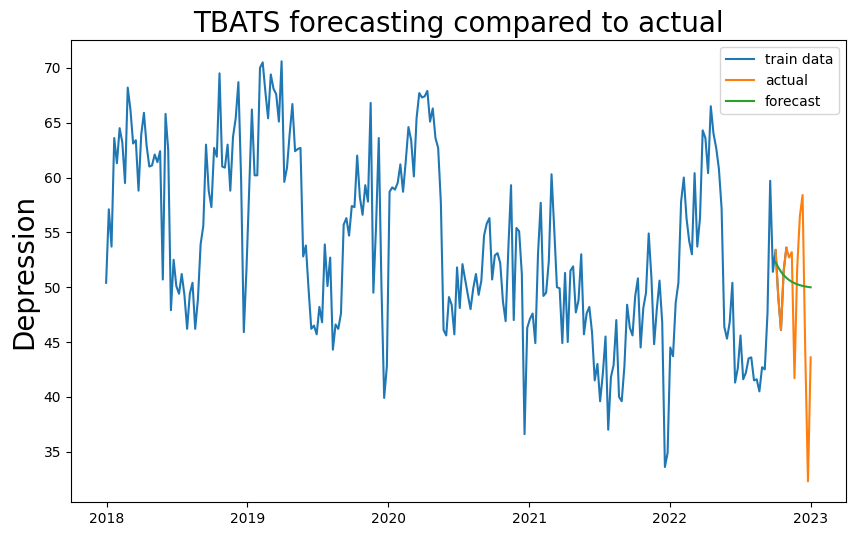

In [18]:
plt.figure(figsize = (10, 6))
plt.plot(y_train, label = 'train data')
plt.plot(y_test, label = 'actual')
plt.plot(y_test.index, y_forecasted, label = 'forecast')
plt.legend()
plt.title('TBATS forecasting compared to actual', size=20)
plt.ylabel('Depression', size=20);

TBATS does not catch the changing pattern of the data. It will not investigate it further.